<a href="https://colab.research.google.com/github/gbiamgaurav/LLM-Chronicles/blob/main/llm_chronicles_mlp_implementation_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron Implementation #2.2

In the initial segment of this notebook, we'll dive deep into the mechanics of a neural network, specifically focusing on a layer of a Multi-Layer Perceptron (MLP). Rather than approaching this with iterative loops, which can be computationally inefficient, we'll harness the power of vectorization. By leveraging linear algebra and matrix operations, we'll see how to efficiently compute the outputs of an MLP layer, setting the foundation for understanding more complex neural network architectures.


![picture](https://raw.githubusercontent.com/kyuz0/llm-chronicles/main/2.2%20-%20Lab%20-%20Multi-Layer%20Perceptron%20and%20MNIST%20/vectorization.png)

In [ ]:
# We're just getting started by importing the numpy library,
# which is like a Swiss Army knife for numerical operations in Python.
# We'll be using it a lot for our matrix operations.

import numpy as np

In [ ]:
# 3x2 Weight matrix for this layer,
# 2 input features, 3 output features (which means 3 perceptrons/units)
WeightMatrix = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

# 2x1, 2 are the input features and 1 in the size of the batch
Input_1 = np.array([
    [0.15],
    [0.25]
])

WeightMatrix, Input_1

(array([[1, 2],
        [3, 4],
        [5, 6]]),
 array([[0.15],
        [0.25]]))

In [ ]:
# Matrix multiplication to perform the weighted sum of the input values
# for each neuron in that layer
np.matmul(WeightMatrix, Input_1)

array([[0.65],
       [1.45],
       [2.25]])

In [ ]:
# 2x3, 2 are the input features and 3 in the size of the batch
Input_1 = np.array([
    [0.15, 0.3, 0.5],
    [0.25, 0.4, 0.6]
])
np.matmul(WeightMatrix, Input_1)

array([[0.65, 1.1 , 1.7 ],
       [1.45, 2.5 , 3.9 ],
       [2.25, 3.9 , 6.1 ]])

## Reshaping input vector

We'll now reshape our input data a bit. Instead of having our data in columns, we're now having them in rows. This is just another way to represent our data, which is more intutive and easier to wrok with in practice.

In [ ]:
# 3x2, 3 is batch size, 2 number of features
Input_2 = np.array([
    [0.15, 0.25],
    [0.3, 0.4],
    [0.5, 0.6]
])

Input_2.shape

(3, 2)

In [ ]:
# This will fail as the row by columns multiplication
# requires the second dimention of the first matrix
# to be equal to the first dimension of the second.
#np.matmul(WeightMatrix, Input_2)

In [ ]:
WeightMatrix.T

array([[1, 3, 5],
       [2, 4, 6]])

In [ ]:
np.matmul(Input_2, WeightMatrix.T)

array([[0.65, 1.45, 2.25],
       [1.1 , 2.5 , 3.9 ],
       [1.7 , 3.9 , 6.1 ]])

## Adding Bias

We can now add another vector for our layer which contains the bias of each neuron.

In [ ]:
bias = np.array([1.1, -2.1, -3.1])

In [ ]:
np.matmul(Input_2, WeightMatrix.T) + bias

array([[ 1.75, -0.65, -0.85],
       [ 2.2 ,  0.4 ,  0.8 ],
       [ 2.8 ,  1.8 ,  3.  ]])

## Adding activation

An activation function introduces non-linearity to the model, allowing it to learn from the error and make adjustments, which is essential for learning complex patterns.

![picture](https://raw.githubusercontent.com/kyuz0/llm-chronicles/main/2.2%20-%20Lab%20-%20Multi-Layer%20Perceptron%20and%20MNIST/activations.png)

Here we'll implement the ReLU (Rectified Linear Unit) function, defined as:

$$\text{ReLU}(x) =
\begin{cases}
x & \text{if } x > 0 \\
0 & \text{otherwise}
\end{cases}$$

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.matmul(Input_2, WeightMatrix.T) + bias

relu(x)

array([[1.75, 0.  , 0.  ],
       [2.2 , 0.4 , 0.8 ],
       [2.8 , 1.8 , 3.  ]])

# Doing it all in PyTorch

In the sections above, we delved deep into matrix operations using numpy. But why did we start there? Because at its core, deep learning is about matrix operations, and numpy provides a foundational understanding of these operations.

![picture](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png?20211003060202)

PyTorch is a leading deep learning framework developed by Facebook's AI Research lab. It offers a dynamic computational graph, which makes it particularly flexible for research. But at its heart, much of what PyTorch does is similar to our numpy operations, albeit optimized and with GPU support.

In the next section, we'll transition from numpy to PyTorch, and you'll see that many concepts carry over seamlessly. The primary difference? With PyTorch, we're better equipped to build, train, and evaluate complex neural network models.

In [ ]:
import torch
from torch import nn

### Linear layer

The PyTorch Linear layer is essentially an encapsulation of the matrix operations we explored with numpy. When you instantiate a Linear layer in PyTorch, you're creating a weight matrix (and an optional bias) under the hood. The forward pass of this layer performs a matrix multiplication with the input and the weight matrix, just like we did with numpy. So, when you think of a Linear layer, imagine it as an automated way of handling the weight matrix creation, management, and operations we manually executed earlier. In essence, the manual matrix multiplications we did using numpy are what the Linear layer in PyTorch does automatically, optimized, and at scale.


In [ ]:
layer = nn.Linear(2,3)

In [ ]:
layer.bias

Parameter containing:
tensor([-0.1300,  0.7063,  0.6780], requires_grad=True)

In [ ]:
layer.weight.data = torch.tensor([
    [1., 2.],
    [3., 4.],
    [5., 6.]
])

layer.weight


Parameter containing:
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], requires_grad=True)

In [ ]:
layer.bias.data = torch.tensor([1.1, -2.1, -3.1])


In [ ]:
Input = torch.tensor([
    [0.15, 0.25],
    [0.3, 0.4],
    [0.5, 0.6]
])

Input

tensor([[0.1500, 0.2500],
        [0.3000, 0.4000],
        [0.5000, 0.6000]])

In [ ]:
layer(Input)

tensor([[ 1.7500, -0.6500, -0.8500],
        [ 2.2000,  0.4000,  0.8000],
        [ 2.8000,  1.8000,  3.0000]], grad_fn=<AddmmBackward0>)

In [ ]:
import torch.nn.functional as F

x= layer(Input)
F.relu(x)

tensor([[1.7500, 0.0000, 0.0000],
        [2.2000, 0.4000, 0.8000],
        [2.8000, 1.8000, 3.0000]], grad_fn=<ReluBackward0>)

# Recognising digits

In this section, we're diving into a hands-on exercise where we'll construct a Multi-Layer Perceptron (MLP) to recognize hand-written digits. We'll be using the MNIST dataset, a collection of 28x28 grayscale images of digits from 0 to 9. Often dubbed the "Hello World" of neural networks, the MNIST dataset is a foundational stepping stone in the world of deep learning. It provides a perfect balance of complexity and manageability, making it an ideal starting point for both beginners and experts looking to validate their models.

In [ ]:
# Download and extract the dataset

!wget https://github.com/kyuz0/mnist-png/raw/main/mnist.tgz
!tar xzf mnist.tgz

--2023-09-23 14:24:08--  https://github.com/kyuz0/mnist-png/raw/main/mnist.tgz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kyuz0/mnist-png/main/mnist.tgz [following]
--2023-09-23 14:24:08--  https://raw.githubusercontent.com/kyuz0/mnist-png/main/mnist.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18294568 (17M) [application/octet-stream]
Saving to: ‘mnist.tgz’

mnist.tgz           100%[===================>]  17.45M  --.-KB/s    in 0.05s   

2023-09-23 14:24:11 (324 MB/s) - ‘mnist.tgz’ saved [18294568/18294568]



In [ ]:
from PIL import Image
import torchvision.transforms as transforms


In [ ]:
image_path = 'mnist/training/0/1.png'
image = Image.open(image_path)
image

## Convert image into tensor

The initial step in our journey involves transforming the PNG images into a more digestible format for our neural network. Specifically, we'll convert these images into matrices or tensors, where each entry corresponds to a pixel in the image. These numerical values represent the brightness or intensity of each pixel, ranging from 0 (complete darkness) to 255 (full brightness). By representing our images as matrices of pixel intensities, we can feed them into our neural network, allowing it to learn and recognize patterns within the hand-written digits.

# ![picture](https://raw.githubusercontent.com/kyuz0/llm-chronicles/main/2.2%20-%20Lab%20-%20Multi-Layer%20Perceptron%20and%20MNIST%20/input.png)

In [ ]:
# Define the transformation
transform = transforms.Compose([
    transforms.ToTensor()
])

# Apply the transformation to the image
tensor_image = transform(image).squeeze(0)

# Check the shape of the tensor
print(tensor_image.shape)

tensor_image[20][22]

torch.Size([28, 28])


tensor(1.)

In [ ]:
tensor_image

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000

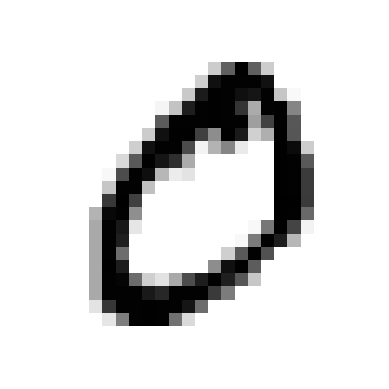

In [ ]:
import matplotlib.pyplot as plt

def imshow(tensor_image):
    plt.imshow(tensor_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Display the tensor image using matplotlib
imshow(tensor_image)

## The model

Here, we're defining our neural network model for the MNIST dataset.

![picture](https://raw.githubusercontent.com/kyuz0/llm-chronicles/main/2.2%20-%20Lab%20-%20Multi-Layer%20Perceptron%20and%20MNIST%20/mpl.png)

*   **Layer 1**: This layer has 28x28 input features, corresponding to the pixels of the MNIST images. It contains 100 units or neurons, and we apply the ReLU activation function to introduce non-linearity.

*   **Layer 2**: This hidden layer has 100 input features from the previous layer and outputs 150 activations for the next layer. We apply the ReLU activation as well for this layer.

*   **Output layer**: Layer 2 connects into this final output layer with 10 units, representing the 10 digits (0-9) we aim to classify. Notice we don't use an activation on the **logits** output by this layer.


In [ ]:
import torch.nn.functional as F

class MNISTNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer1 = nn.Linear(28*28, 100)
    self.Layer2 = nn.Linear(100, 150)
    self.Layer3 = nn.Linear(150, 10)

  def forward(self, x):
    x =  F.relu(self.Layer1(x))
    x =  F.relu(self.Layer2(x))
    x =  self.Layer3(x)
    return x

In [ ]:
model = MNISTNet()
model

MNISTNet(
  (Layer1): Linear(in_features=784, out_features=100, bias=True)
  (Layer2): Linear(in_features=100, out_features=150, bias=True)
  (Layer3): Linear(in_features=150, out_features=10, bias=True)
)

In [ ]:
for name, param in model.named_parameters():
    print(f"Name: {name}")
    print(f"Value: {param.data}")
    print("------")

Name: Layer1.weight
Value: tensor([[-0.0139, -0.0344, -0.0199,  ..., -0.0211,  0.0353,  0.0151],
        [ 0.0040, -0.0198, -0.0183,  ..., -0.0288,  0.0157,  0.0196],
        [ 0.0237, -0.0293,  0.0017,  ..., -0.0073,  0.0090, -0.0320],
        ...,
        [-0.0017, -0.0129, -0.0062,  ..., -0.0018, -0.0121, -0.0116],
        [ 0.0333, -0.0089, -0.0270,  ..., -0.0116,  0.0013,  0.0291],
        [ 0.0279, -0.0016, -0.0223,  ...,  0.0281,  0.0104, -0.0107]])
------
Name: Layer1.bias
Value: tensor([ 0.0084, -0.0315,  0.0074,  0.0312,  0.0090, -0.0083, -0.0153, -0.0118,
         0.0019, -0.0177,  0.0251,  0.0280, -0.0174, -0.0275,  0.0167, -0.0093,
        -0.0046, -0.0015,  0.0016,  0.0036, -0.0112,  0.0330, -0.0103,  0.0098,
        -0.0031, -0.0292, -0.0129, -0.0345,  0.0144, -0.0003,  0.0021,  0.0047,
         0.0311, -0.0060, -0.0153, -0.0207, -0.0066,  0.0203, -0.0266,  0.0246,
        -0.0026,  0.0269,  0.0336, -0.0036, -0.0342, -0.0128, -0.0018, -0.0102,
        -0.0084,  0.0307,  

In [ ]:
model.Layer3.weight.shape

torch.Size([10, 150])

## Forward pass
Let's now take a single image, reshape it into an input tensor, with the first dimention being the batch size of 1 and feed it to the MLP. This will output the logits that we can turn into probabilities using the **softmax** function.

![picture](https://raw.githubusercontent.com/kyuz0/llm-chronicles/main/2.2%20-%20Lab%20-%20Multi-Layer%20Perceptron%20and%20MNIST%20/multi-class.png)

In [ ]:
tensor_image.reshape(1,28*28)

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0

In [ ]:
y_hat = model(tensor_image.reshape(1,28*28))

In [ ]:
y_hat

tensor([[ 0.1321, -0.0515,  0.1063, -0.2405, -0.0755,  0.0825, -0.0529,  0.1211,
         -0.0676, -0.0296]], grad_fn=<AddmmBackward0>)

In [ ]:
F.softmax(y_hat, dim=1)

tensor([[0.1143, 0.0951, 0.1114, 0.0787, 0.0929, 0.1088, 0.0950, 0.1130, 0.0936,
         0.0972]], grad_fn=<SoftmaxBackward0>)

# Using GPUs

One of the standout features of PyTorch is its seamless GPU integration. In this cell, we'll demonstrate how effortlessly you can move your model to the GPU. By doing so, you can harness the power of parallel processing, which GPUs are optimized for, leading to significantly faster computations especially during training. This is particularly beneficial for large-scale neural networks and datasets.


![picture](https://raw.githubusercontent.com/kyuz0/llm-chronicles/main/2.2%20-%20Lab%20-%20Multi-Layer%20Perceptron%20and%20MNIST%20/gpus.png)

In [ ]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda', index=0)

In [ ]:
model.to(DEVICE)

y_hat = model(tensor_image.reshape(1,28*28).to(DEVICE))

In [ ]:
y_hat

tensor([[ 0.1321, -0.0515,  0.1063, -0.2405, -0.0755,  0.0825, -0.0529,  0.1211,
         -0.0676, -0.0296]], device='cuda:0', grad_fn=<AddmmBackward0>)